# Business Problem
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
cc_service=pd.read_excel('C:/Users/Dell/Downloads/bank_service.xlsx')

In [4]:
cc_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
cc_service.head(n=10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,NaN
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,NaN
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,NaN
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,NaN
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,NaN


In [6]:
cc_service.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,0.0
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,NaN
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,NaN
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,NaN
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,NaN
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,NaN
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,NaN


In [7]:
cc_service.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


# Data preprocessing & Cleaning

In [8]:
cc_service=cc_service.drop(columns=['CLIENTNUM'])

# Missing_Value Imputations

In [9]:
cc_service.isnull().sum().sort_values(ascending=False)

Unnamed: 21                 10127
Contacts_Count_12_mon           0
Avg_Utilization_Ratio           0
Total_Ct_Chng_Q4_Q1             0
Total_Trans_Ct                  0
Total_Trans_Amt                 0
Total_Amt_Chng_Q4_Q1            0
Avg_Open_To_Buy                 0
Total_Revolving_Bal             0
Credit_Limit                    0
Attrition_Flag                  0
Customer_Age                    0
Total_Relationship_Count        0
Months_on_book                  0
Card_Category                   0
Income_Category                 0
Marital_Status                  0
Education_Level                 0
Dependent_count                 0
Gender                          0
Months_Inactive_12_mon          0
dtype: int64

In [10]:
cc_service=cc_service.drop(columns=['Unnamed: 21'])

# Outlier_Removal

In [11]:
num_vars=cc_service.select_dtypes(['int64','float64'])
cat_vars=cc_service.select_dtypes(['object'])

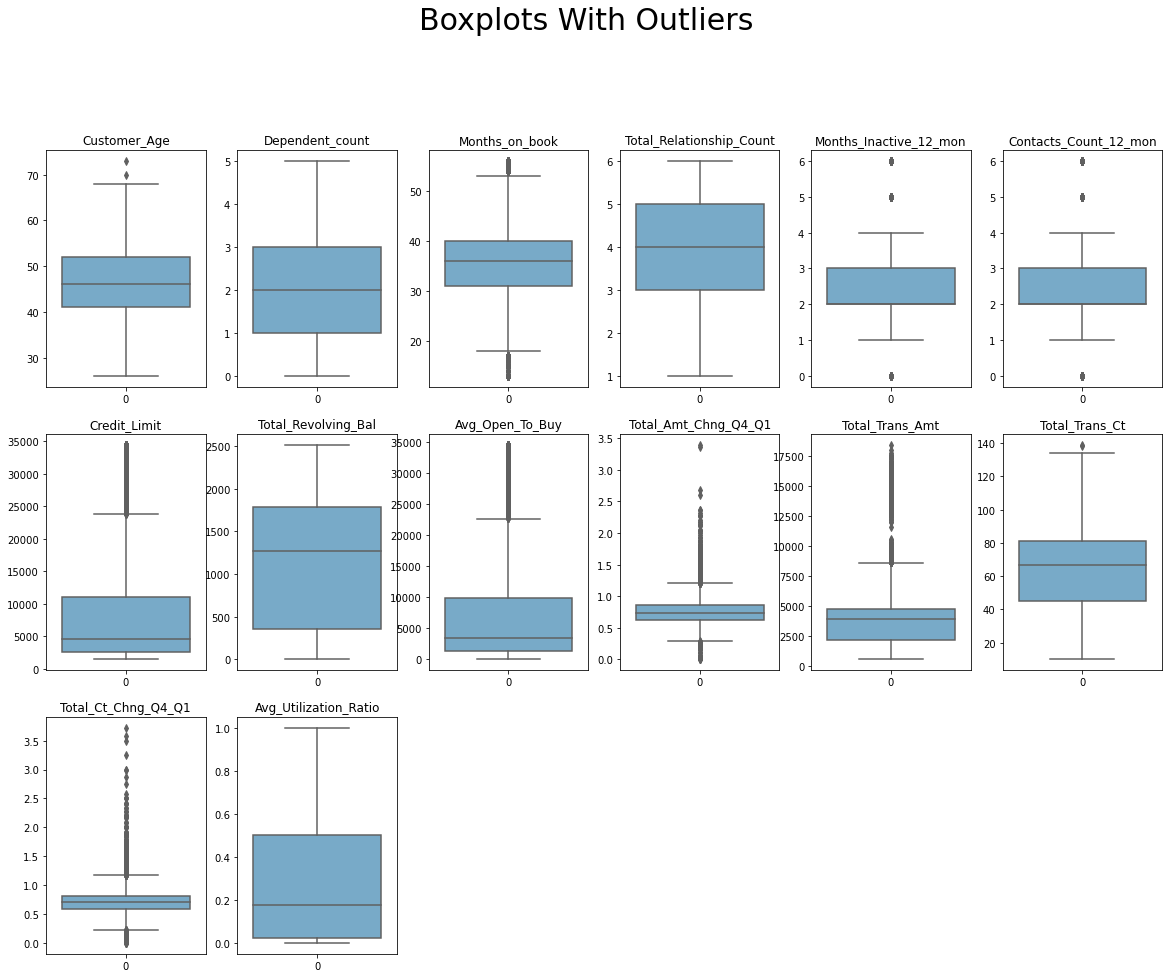

In [12]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(num_vars):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(data=num_vars[column], palette='Blues')
    plt.title(column)

plt.suptitle('Boxplots With Outliers', size=30)
plt.show()

In [13]:
for col in num_vars.columns:
    percentiles = num_vars[col].quantile([0.1, 0.9]).values
    num_vars[col] = np.clip(num_vars[col], percentiles[0], percentiles[1])

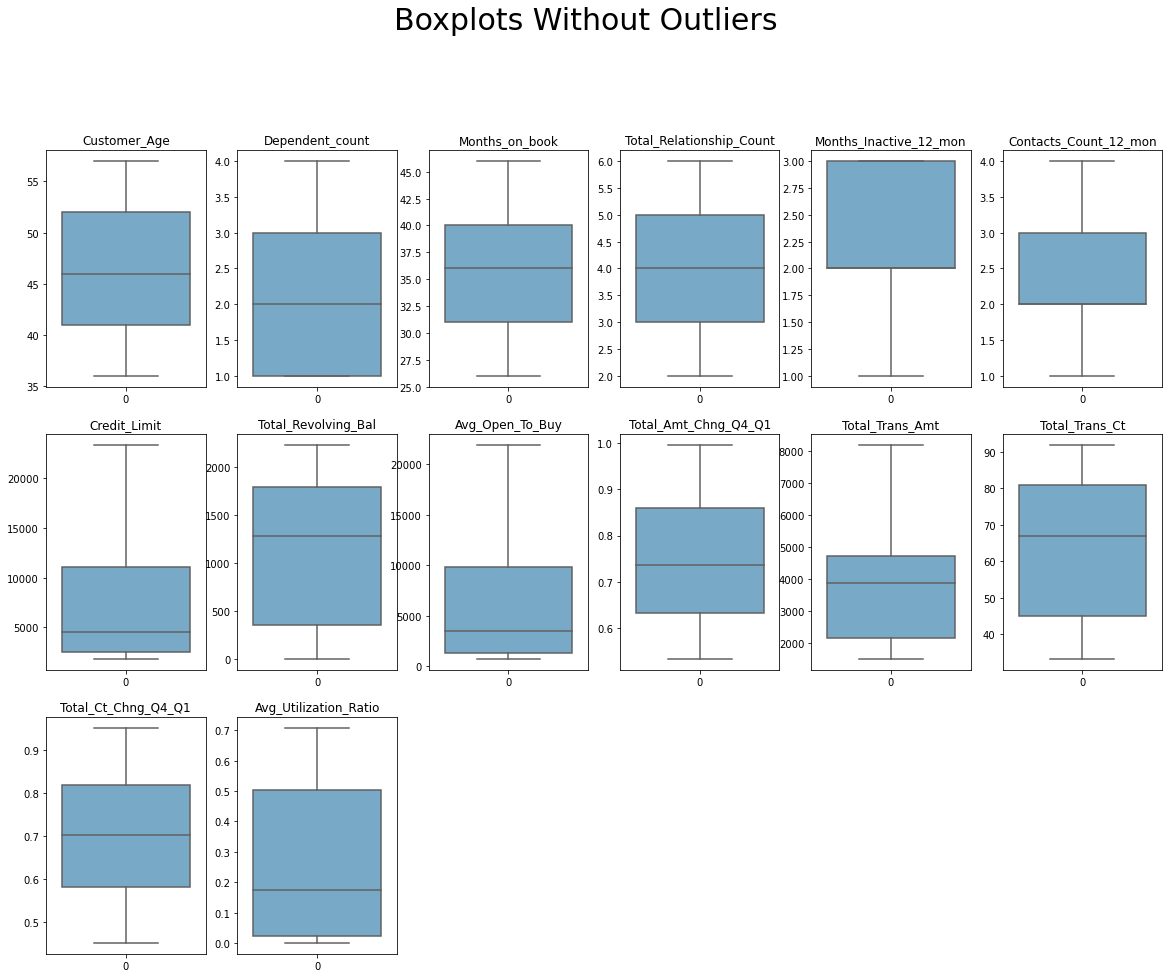

In [14]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(num_vars):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(data=num_vars[column], palette='Blues')
    plt.title(column)

plt.suptitle('Boxplots Without Outliers', size=30)
plt.show()

# Data_Visualization

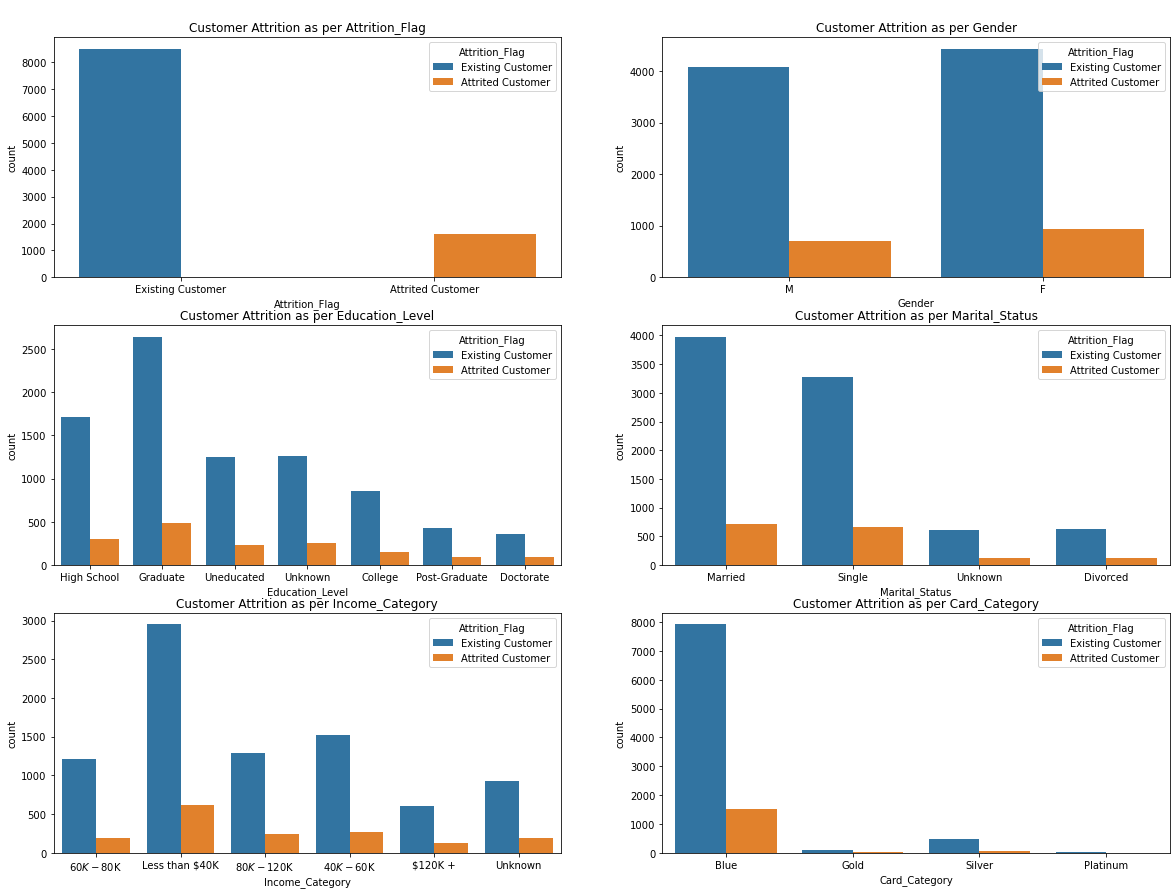

In [15]:
#catagorical_Variables

fig,axs = plt.subplots(3,2,figsize=(20,15))
cols=cat_vars.columns
c=0
for i in range(3):
  for j in range(2):
    sns.countplot(data=cat_vars,x=cols[c],hue='Attrition_Flag',ax=axs[i][j])
    axs[i][j].set_title('\nCustomer Attrition as per {}'.format(cols[c]))
    c+=1
   

# Countplot conclusions :

1-count of existing customer are higher than Attrited.

2-Attrited Female Customers are slightly higher than Male Customers while existing Female Customers are also higher than
existing male Customers'

3-Graduate existing Customers are maximun .

4-married customers is using service mostly.

5-Attrition is higher for income catagory (less than $40k).

6-Attrition is higher for blue card.

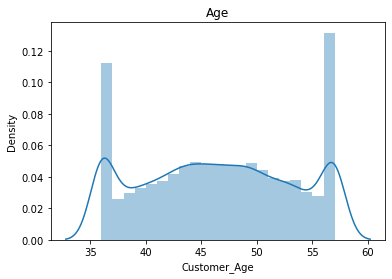

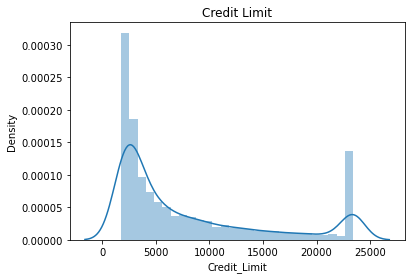

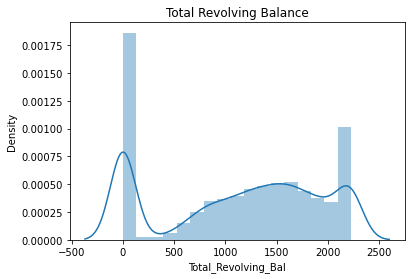

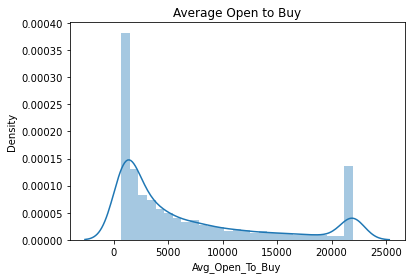

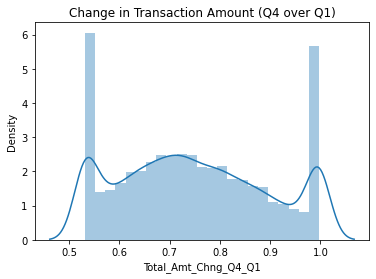

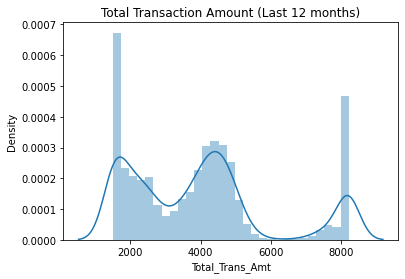

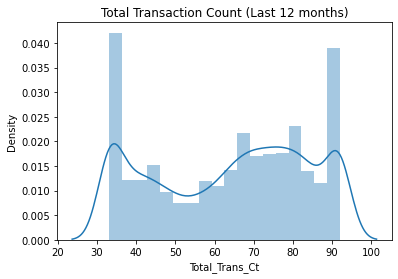

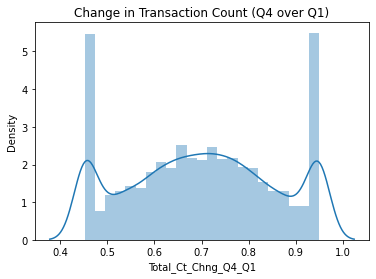

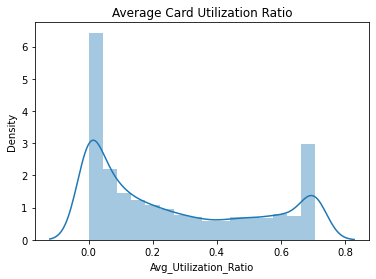

In [16]:
#numerical_variables
plt.figure(12)
plt.title('Age')
sns.distplot(num_vars['Customer_Age'])
plt.show()

plt.title('Credit Limit')
sns.distplot(num_vars['Credit_Limit'])
plt.show()

plt.title('Total Revolving Balance')
sns.distplot(num_vars['Total_Revolving_Bal'])
plt.show()

plt.title('Average Open to Buy')
sns.distplot(num_vars['Avg_Open_To_Buy'])
plt.show()

plt.title('Change in Transaction Amount (Q4 over Q1)')
sns.distplot(num_vars['Total_Amt_Chng_Q4_Q1'])
plt.show()

plt.title('Total Transaction Amount (Last 12 months)')
sns.distplot(num_vars['Total_Trans_Amt'])
plt.show()

plt.title('Total Transaction Count (Last 12 months)')
sns.distplot(num_vars['Total_Trans_Ct'])
plt.show()

plt.title('Change in Transaction Count (Q4 over Q1)')
sns.distplot(num_vars['Total_Ct_Chng_Q4_Q1'])
plt.show()

plt.title('Average Card Utilization Ratio')
sns.distplot(num_vars['Avg_Utilization_Ratio'])
plt.show()

We have the following observations:

The age seems to be normally distributed with mean 46 years.

The credit limit has a skewed normal distribution with mean 2,500. There are a few outliers with a high credit limit near 35,000.

The total revolving balance has a spike at 0. Otherwise, it is distributed around 1,500.

The change in transaction amount is normally distributed with mean 0.7. There is an outlier value of 3.5.

The total transaction amount in the last 12 months is highly varied. A majority of it is focused around the amount <5,000.

Most customers have made a total of between 40-80 transactions in the last 12 months.
    
A majority of the customers have stuck to their spending habits. The change in the number of transactions has more or less remained the same through quarters (0 to 1.5). However, there is an outlier of 3.5.
    
There is a large spike in the card utilization ratio of around 0. That means that a lot of the customers have not used their card at all.



# label encoding

In [17]:
print("Attrition_Flag:",cat_vars['Attrition_Flag'].unique())
print("Gender:",cat_vars['Gender'].unique())
print("Education_Level:",cat_vars['Education_Level'].unique())
print("Marital_Status:",cat_vars['Marital_Status'].unique())
print("Card_Category:",cat_vars['Card_Category'].unique())

Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


In [18]:
label_encoders = {}
for column in cat_vars:
    label_encoders[column] = LabelEncoder()
    cat_vars[column] = label_encoders[column].fit_transform(cat_vars[column]) 
    
print("\nAttrition_Flag:",cat_vars['Attrition_Flag'].unique())
print("Gender:",cat_vars['Gender'].unique())
print("Education_Level:",cat_vars['Education_Level'].unique())
print("Marital_Status:",cat_vars['Marital_Status'].unique())
print("Income_Category:",cat_vars['Income_Category'].unique())
print("Card_Category:",cat_vars['Card_Category'].unique())


Attrition_Flag: [1 0]
Gender: [1 0]
Education_Level: [3 2 5 6 0 4 1]
Marital_Status: [1 2 3 0]
Income_Category: [2 4 3 1 0 5]
Card_Category: [0 1 3 2]


In [19]:
final_data=pd.concat([num_vars,cat_vars],axis=1)

In [20]:
final_data.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,45,3,39,5,1,3,12691.0,777.0,11914.0,0.9974,1501.0,42,0.95,0.061,1,1,3,1,2,0
1,49,4,44,6,1,2,8256.0,864.0,7392.0,0.9974,1501.0,33,0.95,0.105,1,0,2,2,4,0
2,51,3,36,4,1,1,3418.0,0.0,3418.0,0.9974,1887.0,33,0.95,0.000,1,1,2,1,3,0
3,40,4,34,3,3,1,3313.0,2228.4,796.0,0.9974,1501.0,33,0.95,0.707,1,0,3,3,4,0
4,40,3,26,5,1,1,4716.0,0.0,4716.0,0.9974,1501.0,33,0.95,0.000,1,1,5,1,2,0


# crrealtion

<AxesSubplot:>

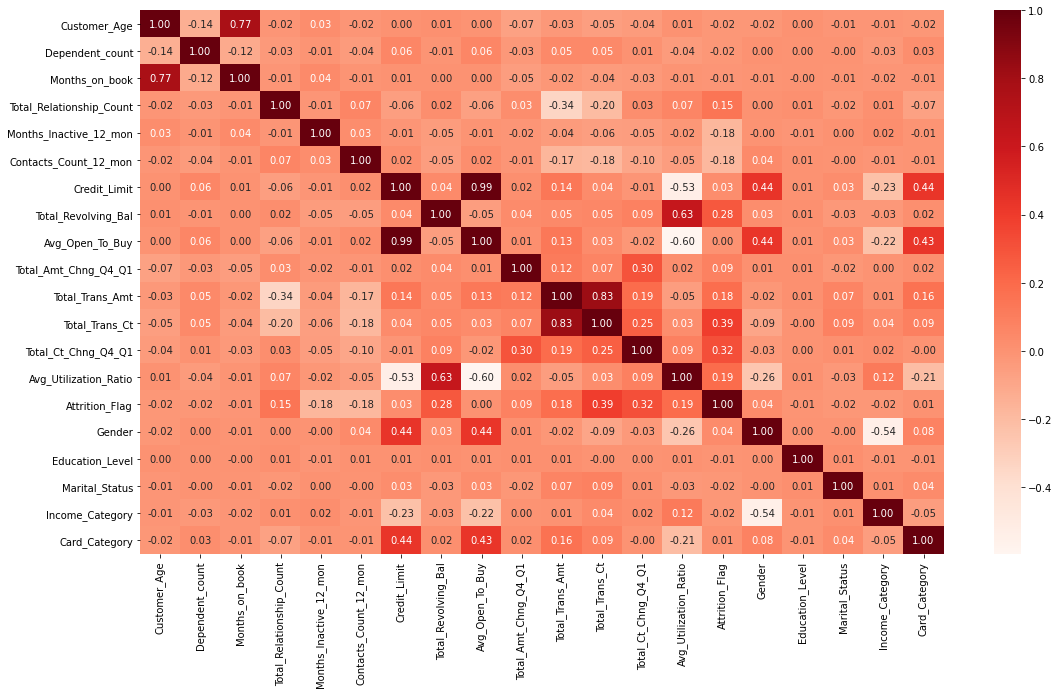

In [21]:
plt.figure(figsize=(18,10))
sns.heatmap(final_data.corr(), cmap='Reds', annot=True, fmt='.2f')

In [22]:
# Create correlation matrix
corr_matrix = final_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [23]:
to_drop

['Months_on_book', 'Avg_Open_To_Buy', 'Total_Trans_Ct']

In [24]:
final_data.drop(to_drop, axis=1, inplace=True)
final_data.shape

(10127, 17)

In [25]:
#Spliting the data into test and train
df_train, df_test = train_test_split(final_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
df_train.shape, df_test.shape

((7088, 17), (3039, 17))

# Rescaling the data:

In [27]:
num_vars=final_data.select_dtypes(['int64','float64'])

In [28]:
num_vars.columns

Index(['Customer_Age', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [29]:
col_list = ['Customer_Age', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [30]:
scaler = StandardScaler()
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [31]:
df_train.describe()

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,7.088000e+03,7.088000e+03,7.088000e+03,7.088000e+03,7.088000e+03,7.088000e+03,7.088000e+03,7.088000e+03,7.088000e+03,7.088000e+03,7.088000e+03,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000
mean,-3.588332e-16,-3.657486e-16,7.822115e-17,-4.008738e-16,1.488651e-16,-7.700136e-17,-1.662124e-16,5.016993e-16,-2.177137e-16,1.448866e-16,1.141863e-17,0.844244,0.467551,3.097207,1.465576,2.867523,0.175508
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.362650,0.498981,1.841620,0.738928,1.503329,0.686674
min,-1.517660e+00,-1.285012e+00,-1.350422e+00,-1.550225e+00,-1.496613e+00,-8.570437e-01,-1.448636e+00,-1.490113e+00,-1.204531e+00,-1.615819e+00,-1.032213e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.779385e-01,-1.285012e+00,-6.414006e-01,-2.828670e-01,-4.722798e-01,-7.432207e-01,-1.154240e+00,-7.943794e-01,-8.697678e-01,-7.440829e-01,-9.660328e-01,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000
50%,-3.821753e-02,-3.589150e-01,6.762115e-02,-2.828670e-01,-4.722798e-01,-4.661947e-01,1.708592e-01,-7.818321e-02,-1.647257e-02,1.227615e-02,-3.431572e-01,1.000000,0.000000,3.000000,1.000000,3.000000,0.000000
75%,8.494477e-01,5.671824e-01,7.766429e-01,9.844915e-01,5.520529e-01,4.278341e-01,8.254609e-01,7.539685e-01,3.908405e-01,7.622254e-01,9.298448e-01,1.000000,1.000000,5.000000,2.000000,4.000000,0.000000
max,1.589169e+00,1.493280e+00,1.485665e+00,9.844915e-01,1.576386e+00,2.217767e+00,1.385195e+00,1.691162e+00,2.090998e+00,1.576273e+00,1.720118e+00,1.000000,1.000000,6.000000,3.000000,5.000000,3.000000


In [32]:
#Model building:
y = df_train.pop('Attrition_Flag')
X = df_train

# Model building 

In [34]:
logit_model=sm.Logit(y,X)
lr=logit_model.fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.323243
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                 7088
Model:                          Logit   Df Residuals:                     7072
Method:                           MLE   Df Model:                           15
Date:                Sat, 09 Apr 2022   Pseudo R-squ.:                  0.2527
Time:                        10:10:59   Log-Likelihood:                -2291.1
converged:                       True   LL-Null:                       -3066.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Customer_Age                -0.0331      0.039     -0.854      0.393      -0.109       0.043
Dependent_count             -0.0890      0.039     -2.304      0.021      -0.165      -0.013
Total_Relationship_Count     0.6050      0.043     14.030      0.000       0.520       0.690
Months_Inactive_12_mon      -0.5075      0.042    -12.071      0.000      -0.590      -0.425
Contacts_Count_12_mon       -0.4602      0.040    -11.486      0.000      -0.539      -0.382
Credit_Limit                -0.0773      0.056     -1.380      0.167      -0.187       0.032
Total_Revolving_Bal          0.5387      0.062      8.649      0.000       0.417       0.661
Total_Amt_Chng_Q4_Q1        -0.0793      0.039     -2.017      0.044      -0.156      -0.002
Total_Trans_Amt              0.4188      0.046      9.067      0.000       0.328       0.509
Total_Ct_Chng_Q4_Q1          0.8140      0.044     18.517      0.000       0.728       0.900
Avg_Utilization_Ratio        0.2051      0.073      2.806      0.005       0.062       0.348
Gender                       1.2476      0.085     14.733      0.000       1.082       1.414
Education_Level              0.1246      0.019      6.645      0.000       0.088       0.161
Marital_Status               0.2726      0.046      5.988      0.000       0.183       0.362
Income_Category              0.3164      0.022     14.702      0.000       0.274       0.359
Card_Category                0.0584      0.064      0.916      0.360      -0.067       0.183
============================================================================================
"""

# class weight in logisitic regression

In [35]:
#droping variabels having p_value<0.05

X1=df_train[['Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender',
       'Education_Level', 'Marital_Status', 'Income_Category']]

In [36]:
train_X, test_X, train_y, test_y = train_test_split( X1,y,test_size = 0.3,random_state = 100)
train_X.shape

(4961, 13)

In [37]:
lr2 = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr2, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(train_X,train_y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [38]:
gridsearch.best_params_

{'class_weight': {0: 0.452713567839196, 1: 0.547286432160804}}

In [41]:
#importing and training the model
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.452713567839196, 1: 0.547286432160804})
lr.fit(train_X, train_y)

# Predicting on the test data
y_pred_test = lr.predict(test_X)
y_pred_train = lr.predict(train_X)


In [42]:
from sklearn.metrics import f1_score
#Calculating and printing the f1 score 
f1_test = f1_score( test_y, y_pred_test)
print('The f1 score for the testing data:', f1_test)
f1_train = f1_score(train_y,y_pred_train)
print('The f1 score for the training data:', f1_train)

The f1 score for the testing data: 0.9383434771103466
The f1 score for the training data: 0.9366221308667352


[[ 121  199]
 [  34 1773]]


Text(0.5, 15.0, 'Predicted label')

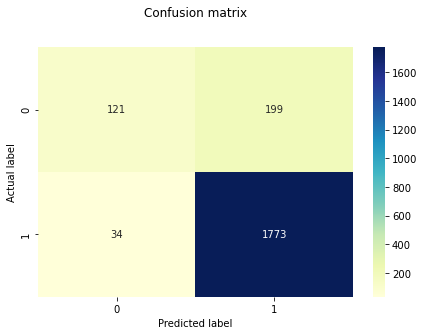

In [43]:
confusion_matrix = confusion_matrix( test_y, y_pred_test)
print(confusion_matrix)

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
from sklearn import metrics
print("\nPrecision:",metrics.precision_score(train_y,y_pred_train))
print("Recall:",metrics.recall_score( train_y,y_pred_train))


Precision: 0.895414847161572
Recall: 0.9818051232942303


In [46]:
result1 = classification_report(train_y,y_pred_train)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.39      0.52       784
           1       0.90      0.98      0.94      4177

    accuracy                           0.89      4961
   macro avg       0.85      0.69      0.73      4961
weighted avg       0.88      0.89      0.87      4961

